<a href="https://colab.research.google.com/github/Debabrat1/Machine_Learning_Codes/blob/main/ML_Lab_Assignment_8(Debabrat_Sarma_2002007_M_Tech_ECE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q.1. Synthetic data generation and simple curve fitting**
(a) Generate a synthetic dataset as follows. The input values {x } are generated uniformly i
in range [0, 1] , and the corresponding target values {yi} are obtained by first computing
the corresponding values of the function sin(2Πx) , and then adding a random noise with
a Gaussian distribution having standard deviation 0.3. Generate 10 such instances of
(xi
, yi
) . [You can use any standard module to generate random numbers as per a
gaussian / normal distribution, e.g., numpy.random.normal for python.]
(b) Split the dataset into two sets randomly: (i) Training Set (80%) (ii) Test Set (20%).
(c) Write a code to fit a curve that minimizes squared error cost function using gradient
descent (with learning rate 0.05), as discussed in class, on the training set while the
model takes following form y = W Φ (x) , , .
T
n W ∈ R
n+1 Φn(x) = [1, x, x , x ... , x ]
2 3 n
Squared error is defined as J(θ) = . In your experiment, vary
1
2m ∑
m
i=1
(W Φ (x)
T
n − y)
2
n
from 1 to 9. In other words, fit 9 different curves to the training data, and hence estimate
the parameters. Use the estimated W to measure squared error on the test set, and
name it as test error on test data.


In [ ]:
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
x1 = []
y = []
n = 10
for i in range(n):
    x1.append(random.uniform(0, 1))   
for i in range(n):
    noise = np.random.normal(scale= 0.3)
#     print(noise)
    temp = noise + math.sin(2*math.pi*x1[i])
    y.append(temp) 
# for i in range(n):    
#     print("(", x1[i],", " ,y[i], ")")
train_error = []
test_error = []

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
n1 = int(0.8*n)
n2 = int(0.2*n)
for i in range(n1):
    x2.append(x_train[i]*x_train[i])
    x3.append(x2[i]*x_train[i])
    x4.append(x3[i]*x_train[i])
    x5.append(x4[i]*x_train[i])
    x6.append(x5[i]*x_train[i])
    x7.append(x6[i]*x_train[i])
    x8.append(x7[i]*x_train[i])
    x9.append(x8[i]*x_train[i])
    
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
for i in range(n2):
    x2_test.append(x_test[i]*x_test[i])
    x3_test.append(x2_test[i]*x_test[i])
    x4_test.append(x3_test[i]*x_test[i])
    x5_test.append(x4_test[i]*x_test[i])
    x6_test.append(x5_test[i]*x_test[i])
    x7_test.append(x6_test[i]*x_test[i])
    x8_test.append(x7_test[i]*x_test[i])
    x9_test.append(x8_test[i]*x_test[i])

print(x_train[0], x2[0], x3[0], x4[0], x5[0], x6[0])

0.24955913211255853 0.06227976042077345 0.015542482958786295 0.0038787685580689386 0.0009679821150171645 0.00024156877652416238


In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum(abs((X.dot(B) - Y)))/(2 * m)
    return J

In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
#         print(cost)
        
    return B, cost_history

In [ ]:
def parameterX_n(n):
    m = len(x_train)
    x0 = np.ones(m)
    
    m2 = len(x_test)
    x0_test = np.ones(m2)
    #Taking transpose of X matrix
    # X = np.array([x0]).T
    if n ==0:
        X = np.array([x0]).T
        B = np.array([0])
        X_test = np.array([x0_test]).T
    elif n==1:
        X = np.array([x0, x_train]).T
        B = np.array([0, 0])
        X_test = np.array([x0_test, x_test]).T
    elif n==2:
        X = np.array([x0, x_train, x2]).T
        B = np.array([0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test]).T
    elif n==3:
        X = np.array([x0, x_train, x2, x3]).T
        B = np.array([0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test]).T
    elif n==4:
        X = np.array([x0, x_train, x2, x3, x4]).T
        B = np.array([0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test]).T
    elif n==5:
        X = np.array([x0, x_train, x2, x3, x4, x5]).T
        B = np.array([0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test]).T
    elif n==6:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test]).T
    elif n==7:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test]).T
    elif n==8:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test]).T
    elif n==9:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8, x9]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test]).T   
    return X, B, X_test

# **Case 1: N = 0**
i.e. Y = *b0*

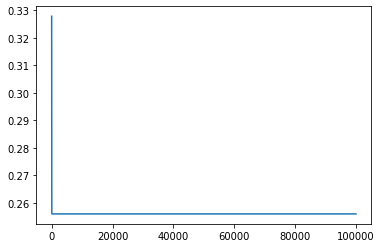

In [ ]:
N = 0 
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=0**

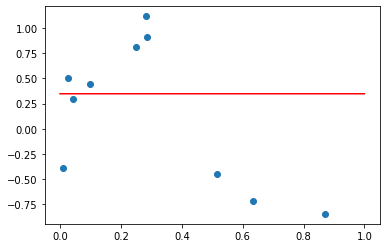

In [ ]:
#Curve Fiting
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0])
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([0.34764838])

# **Case 2: N = 1**
i.e. Y = b0 + b1*x

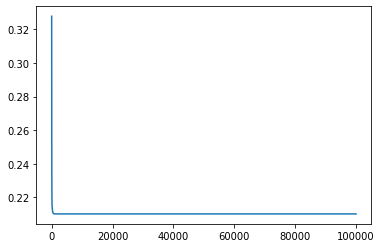

In [ ]:
N = 1
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=1**

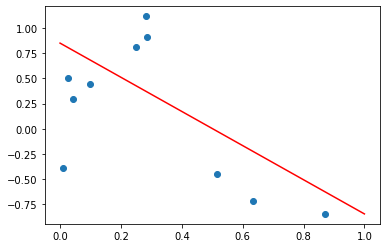

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp)
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([ 0.85138851, -1.69917373])

# **Case 3: N = 2**
i.e. Y = b0 + b1*x + b2*x2

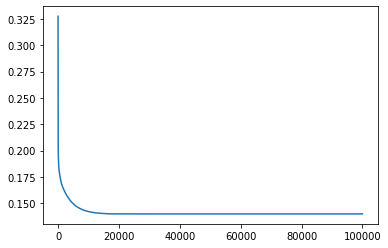

In [ ]:
N = 2
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=2**

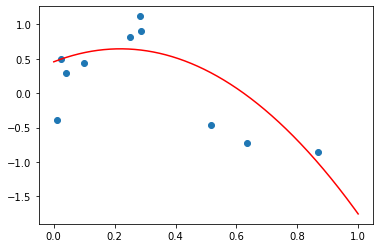

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([ 0.45620438,  1.72283839, -3.93278372])

# **Case 4: N = 3**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3

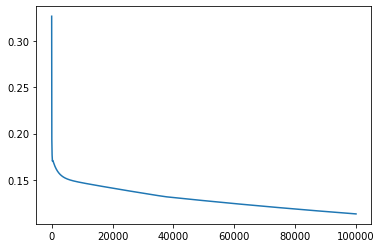

In [ ]:
N = 3
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=3**

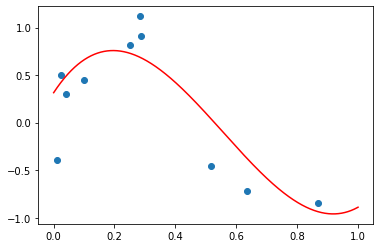

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.31395782,   4.88855301, -15.17371372,   9.08220883])

# **Case 5: N = 4**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4

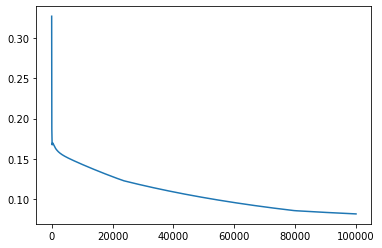

In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=4**

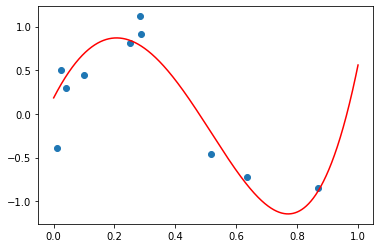

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.18231911,   6.76990754, -16.67424029,  -2.56139164,
        12.84305789])

# **Case 6: N = 5**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5

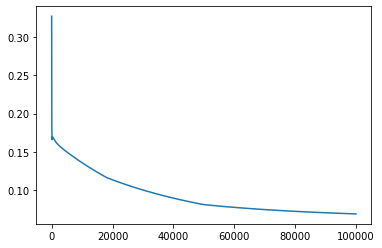

In [ ]:
N = 5
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=5**

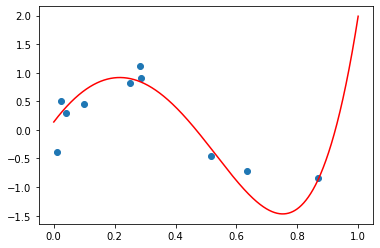

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.13708934,   7.03874064, -14.82778932,  -6.49451258,
         4.63472646,  11.49909317])

# **Case 7: N = 6**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6

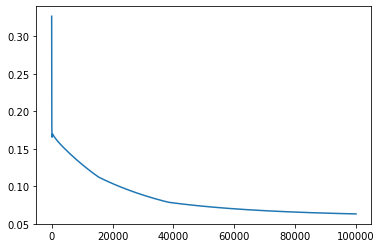

In [ ]:
N = 6
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=6**

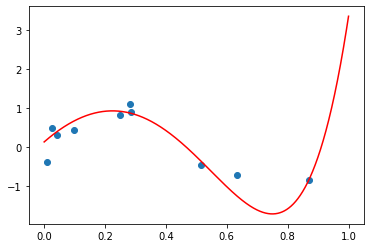

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.12930791,   6.84365039, -13.0339099 ,  -7.66692807,
         1.02971383,   6.70055079,   9.36210024])

# **Case 8: N = 7**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7

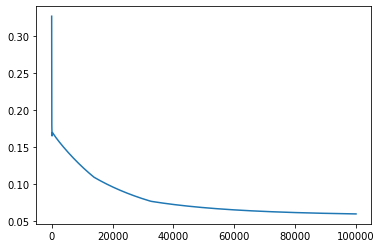

In [ ]:
N = 7
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=7**

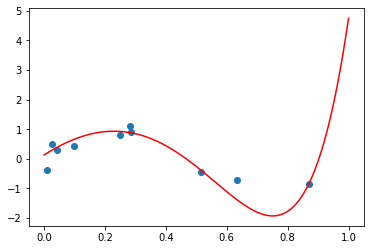

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.13149403,   6.61197672, -11.78572756,  -8.00421004,
        -0.69489546,   4.26493506,   6.70626159,   7.51880176])

# **Case 9: N = 8**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8

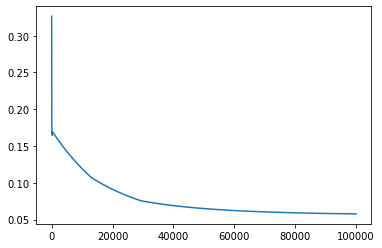

In [ ]:
N = 8
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=8**

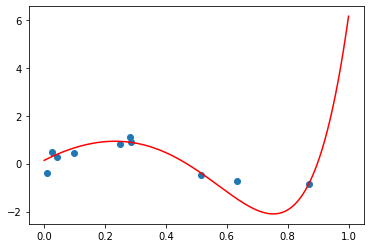

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7)+newB[8]*((x_temp)**8))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.13525967,   6.4299353 , -10.96380724,  -8.09038967,
        -1.60928085,   2.9152117 ,   5.21247578,   6.04526784,
         6.07488153])

# **Case 10: N = 9**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8 + b9*x9

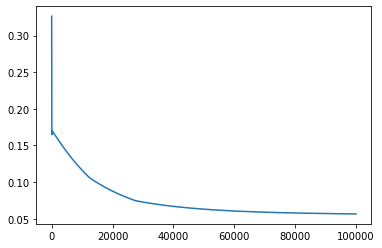

In [ ]:
N = 9
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=9**

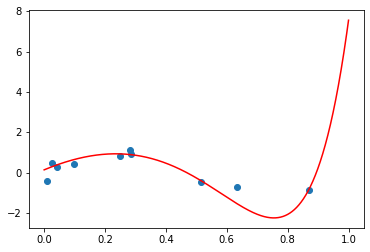

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7)+newB[8]*((x_temp)**8)+newB[9]*((x_temp)**9))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp, 'r')
plt.show()

In [ ]:
newB

array([  0.13857516,   6.29907015, -10.42042004,  -8.10086989,
        -2.13846989,   2.10916622,   4.31137821,   5.15237348,
         5.24039918,   4.95913973])

# **Train Error vs Test Error**

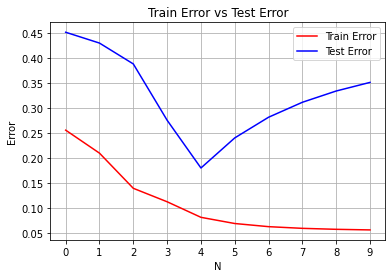

In [ ]:
X_N = [0,1,2,3,4,5,6,7,8,9]
plt.plot(X_N,train_error, 'r', label='Train Error')
plt.plot(X_N,test_error, 'b', label='Test Error')
plt.title('Train Error vs Test Error')
plt.ylabel('Error')
plt.xlabel('N')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 10, step=1))
plt.show()

Test Error is recorded in the list test_error. Test Error correspoding to N is given by test_error[n]

From the above plot we can conclude that N = 1 is the best fit because the test error is minimum. For N>1 there is overfitting, as the test error stats increasing thus N>1 is ignored.

# **RMSE vs learning rate**
For N=1; i.e. Y = B0 + B1*X1

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

N = 1
X, B, X_test = parameterX_n(N)
Y = y_train
rmse_value = []

for i in range(5):
    if i==0:
        alpha = 0.025
    elif i==1:
        alpha = 0.05
    elif i==2:
        alpha = 0.1
    elif i==3:
        alpha = 0.2
    elif i==4:
        alpha = 0.5
    
    newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
    if alpha == 0.1:
        final_train_cost = cost_history[-1]
        final_test_cost = cost_function(X_test, y_test, newB)
    Y_pred = X_test.dot(newB)
    rmse_value.append(rmse(y_test, Y_pred))

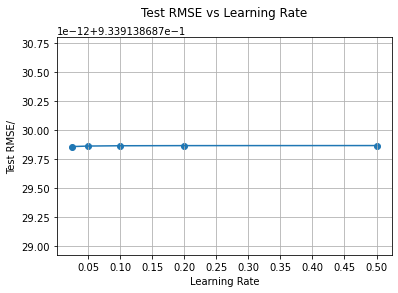

In [ ]:
X_N = [0.025,0.05,0.1,0.2,0.5]
plt.plot(X_N,rmse_value)
plt.title('Test RMSE vs Learning Rate\n     ')
plt.ylabel('Test RMSE/')
plt.xlabel('Learning Rate')
# plt.legend()
plt.grid()
plt.xticks(np.arange(0, 0.6, step=0.05))
plt.scatter(X_N,rmse_value)
plt.show()

In [ ]:
print(final_train_cost, ',', final_test_cost)

0.21006115567705655 , 0.430112912615362


# **Q.2. Visualization of the dataset and the fitted curves**
(a) Draw separate plots of the synthetic data points generated in 1 (a), and all 9 different
curves that you have fit for the given dataset in 1 (c).
(b) Report squared error on both train and test data for each value of n in the form of a
plot where along x-axis, vary n from 1 to 9 and along y-axis, plot both train error and
test error. Explain which value of n is suitable for the synthetic dataset that you have
generated and why

In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
#         print(cost)
        
    return B, cost_history

In [ ]:
def parameterX_n(n):
    m = len(x_train)
    x0 = np.ones(m)
    
    m2 = len(x_test)
    x0_test = np.ones(m2)
    #Taking transpose of X matrix
    # X = np.array([x0]).T
    if n ==0:
        X = np.array([x0]).T
        B = np.array([0])
        X_test = np.array([x0_test]).T
    elif n==1:
        X = np.array([x0, x_train]).T
        B = np.array([0, 0])
        X_test = np.array([x0_test, x_test]).T
    elif n==2:
        X = np.array([x0, x_train, x2]).T
        B = np.array([0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test]).T
    elif n==3:
        X = np.array([x0, x_train, x2, x3]).T
        B = np.array([0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test]).T
    elif n==4:
        X = np.array([x0, x_train, x2, x3, x4]).T
        B = np.array([0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test]).T
    elif n==5:
        X = np.array([x0, x_train, x2, x3, x4, x5]).T
        B = np.array([0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test]).T
    elif n==6:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test]).T
    elif n==7:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test]).T
    elif n==8:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test]).T
    elif n==9:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8, x9]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test]).T   
    return X, B, X_test

# **Case 1: N = 0**
i.e. Y = b0

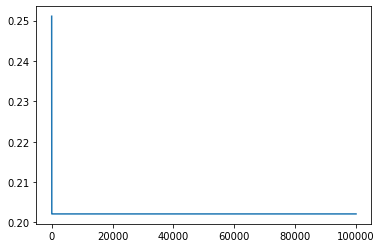

In [ ]:
N = 0 
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()


# **Curve Fiting for N=0**

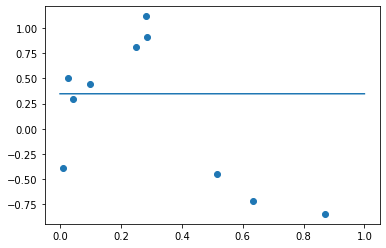

In [ ]:
#Curve Fiting
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0])
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([0.34764838])

# **Case 2: N = 1**
i.e. Y = b0 + b1*x

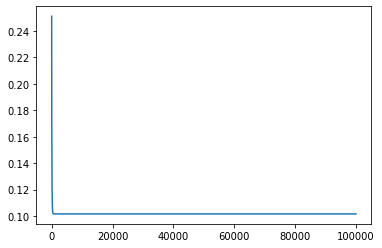

In [ ]:
N = 1
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=1**

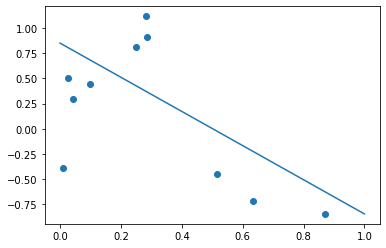

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp)
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([ 0.85138851, -1.69917373])

# **Case 3: N = 2**
i.e. Y = b0 + b1*x + b2*x2

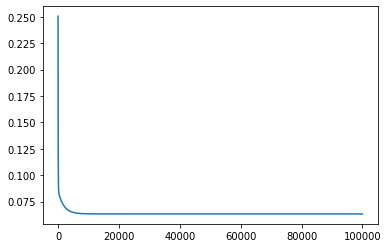

In [ ]:
N = 2
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=2**

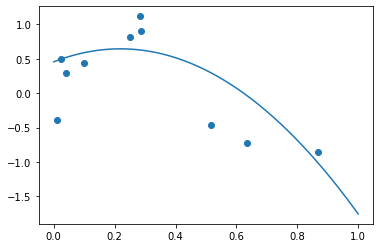

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([ 0.45620438,  1.72283839, -3.93278372])

# **Case 4: N = 3**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3

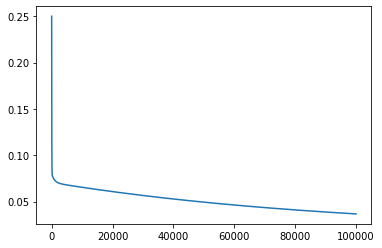

In [ ]:
N = 3
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=3**

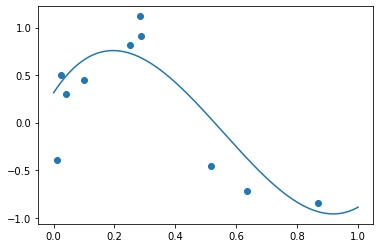

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.31395782,   4.88855301, -15.17371372,   9.08220883])

# **Case 5: N = 4**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4

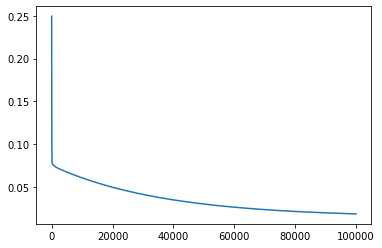

In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=4**

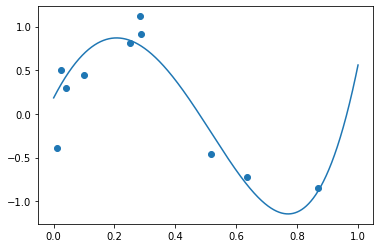

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.18231911,   6.76990754, -16.67424029,  -2.56139164,
        12.84305789])

# **Case 6: N = 5**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5

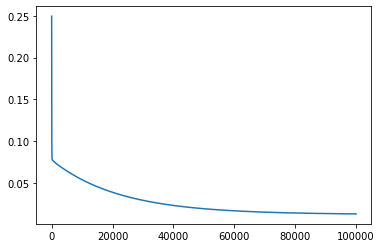

In [ ]:
N = 5
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=5**

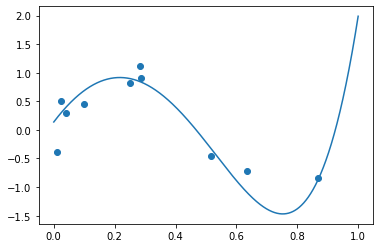

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.13708934,   7.03874064, -14.82778932,  -6.49451258,
         4.63472646,  11.49909317])

# **Case 7: N = 6**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 

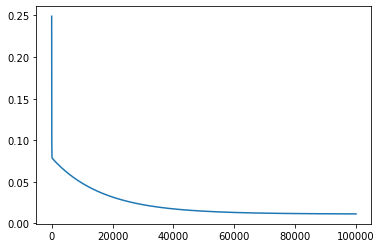

In [ ]:
N = 6
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=6**

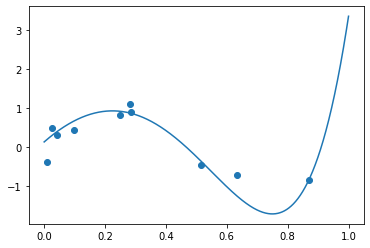

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.12930791,   6.84365039, -13.0339099 ,  -7.66692807,
         1.02971383,   6.70055079,   9.36210024])

# **Case 8: N = 7**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7

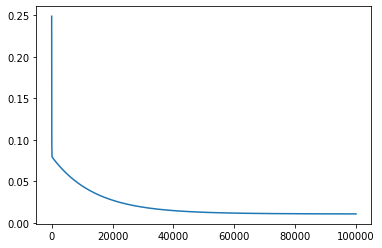

In [ ]:
N = 7
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=7**

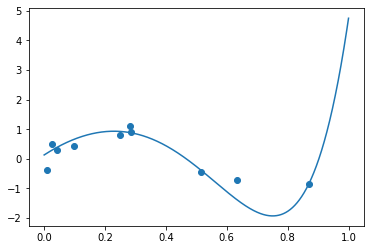

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.13149403,   6.61197672, -11.78572756,  -8.00421004,
        -0.69489546,   4.26493506,   6.70626159,   7.51880176])

# **Case 9: N = 8**
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8

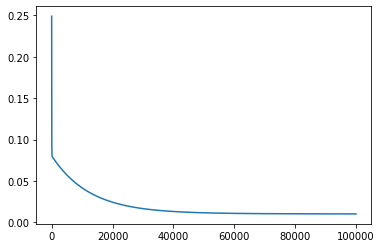

In [ ]:

N = 8
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=8**

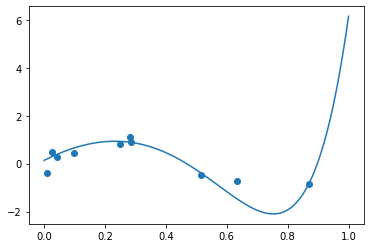

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7)+newB[8]*((x_temp)**8))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.13525967,   6.4299353 , -10.96380724,  -8.09038967,
        -1.60928085,   2.9152117 ,   5.21247578,   6.04526784,
         6.07488153])

Case 10: N = 9
i.e. Y = b0 + b1*x + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8 + b9*x9

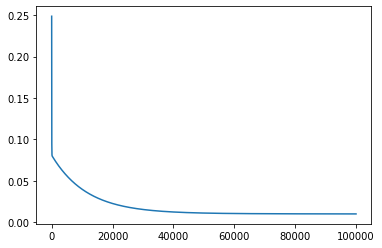

In [ ]:
N = 9
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

#Test Error
test_error.append(cost_function(X_test, y_test, newB))

#Learning Curve for Train Error
time = []
time_temp = 0
for i in range(len(cost_history)):
    time_temp += 1
    time.append(time_temp)
plt.plot(time,cost_history)
plt.show()

# **Curve Fiting for N=9**

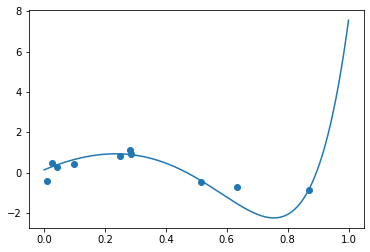

In [ ]:
Y_hyp = []
X_t = []
x_temp = 0
for i in range(5000):
    x_temp += .0002
    X_t.append(x_temp)
    Y_hyp.append(newB[0]+newB[1]*x_temp+newB[2]*((x_temp)**2)+newB[3]*((x_temp)**3)+newB[4]*((x_temp)**4)+newB[5]*((x_temp)**5)+newB[6]*((x_temp)**6)+newB[7]*((x_temp)**7)+newB[8]*((x_temp)**8)+newB[9]*((x_temp)**9))
plt.scatter(x1,y)
plt.plot(X_t,Y_hyp)
plt.show()

In [ ]:
newB

array([  0.13857516,   6.29907015, -10.42042004,  -8.10086989,
        -2.13846989,   2.10916622,   4.31137821,   5.15237348,
         5.24039918,   4.95913973])

# **Train Error vs Test Error**

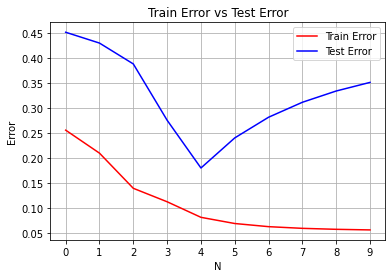

In [ ]:
X_N = [0,1,2,3,4,5,6,7,8,9]
plt.plot(X_N,train_error, 'r', label='Train Error')
plt.plot(X_N,test_error, 'b', label='Test Error')
plt.title('Train Error vs Test Error')
plt.ylabel('Error')
plt.xlabel('N')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 10, step=1))
plt.show()

Test Error is recorded in the list test_error. Test Error correspoding to N is given by test_error[n]

From the above plot we can conclude that N = 4 is the best fit because the test error is minimum. For N>4 there is overfitting, as the test error is increasing thus N>4 is ignored.

# **RMSE vs learning rate**
For N=4; i.e. Y = B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4 

In [ ]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
rmse_value = []

for i in range(5):
    if i==0:
        alpha = 0.025
    elif i==1:
        alpha = 0.05
    elif i==2:
        alpha = 0.1
    elif i==3:
        alpha = 0.2
    elif i==4:
        alpha = 0.5
    
    newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
    if alpha == 0.1:
        final_train_cost = cost_history[-1]
        final_test_cost = cost_function(X_test, y_test, newB)
    Y_pred = X_test.dot(newB)
    rmse_value.append(rmse(y_test, Y_pred))

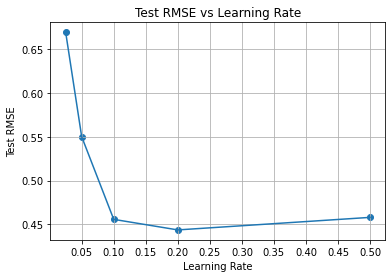

In [ ]:
X_N = [0.025,0.05,0.1,0.2,0.5]
plt.plot(X_N,rmse_value)
plt.title('Test RMSE vs Learning Rate')
plt.ylabel('Test RMSE')
plt.xlabel('Learning Rate')
# plt.legend()
plt.grid()
plt.xticks(np.arange(0, 0.6, step=0.05))
plt.scatter(X_N,rmse_value)
plt.show()

In [ ]:
print(final_train_cost, ',', final_test_cost)

0.01824743222071163 , 0.10384242026487682


# **Q.3. Experimenting with larger training set**
Repeat the above experiment with three other datasets having size 100, 1000 and 10,000
instances (each dataset generated similarly as described in Part 1a).
Draw the learning curve of how train and test error varies with increase in size of datasets (for
10, 100, 1000 and 10000 instances).

In [ ]:
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
x1 = []
y = []
n = 10
for i in range(n):
    x1.append(random.uniform(0, 1))   
for i in range(n):
    noise = np.random.normal(scale= 0.3)
#     print(noise)
    temp = noise + math.sin(2*math.pi*x1[i])
    y.append(temp) 
# for i in range(n):    
#     print("(", x[i],", " ,y[i], ")")
train_error = []
test_error = []

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
n1 = int(0.8*n)
n2 = int(0.2*n)
for i in range(n1):
    x2.append(x_train[i]*x_train[i])
    x3.append(x2[i]*x_train[i])
    x4.append(x3[i]*x_train[i])
    x5.append(x4[i]*x_train[i])
    x6.append(x5[i]*x_train[i])
    x7.append(x6[i]*x_train[i])
    x8.append(x7[i]*x_train[i])
    x9.append(x8[i]*x_train[i])
    
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
for i in range(n2):
    x2_test.append(x_test[i]*x_test[i])
    x3_test.append(x2_test[i]*x_test[i])
    x4_test.append(x3_test[i]*x_test[i])
    x5_test.append(x4_test[i]*x_test[i])
    x6_test.append(x5_test[i]*x_test[i])
    x7_test.append(x6_test[i]*x_test[i])
    x8_test.append(x7_test[i]*x_test[i])
    x9_test.append(x8_test[i]*x_test[i])

print(x_train[0], x2[0], x3[0], x4[0], x5[0], x6[0])

0.407996753472751 0.16646135084430475 0.06791569072316492 0.027709381324910718 0.011305337621302048 0.004612541046404589


In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
#         print(cost)
        
    return B, cost_history

In [ ]:
def parameterX_n(n):
    m = len(x_train)
    x0 = np.ones(m)
    
    m2 = len(x_test)
    x0_test = np.ones(m2)
    #Taking transpose of X matrix
    # X = np.array([x0]).T
    if n ==0:
        X = np.array([x0]).T
        B = np.array([0])
        X_test = np.array([x0_test]).T
    elif n==1:
        X = np.array([x0, x_train]).T
        B = np.array([0, 0])
        X_test = np.array([x0_test, x_test]).T
    elif n==2:
        X = np.array([x0, x_train, x2]).T
        B = np.array([0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test]).T
    elif n==3:
        X = np.array([x0, x_train, x2, x3]).T
        B = np.array([0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test]).T
    elif n==4:
        X = np.array([x0, x_train, x2, x3, x4]).T
        B = np.array([0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test]).T
    elif n==5:
        X = np.array([x0, x_train, x2, x3, x4, x5]).T
        B = np.array([0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test]).T
    elif n==6:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test]).T
    elif n==7:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test]).T
    elif n==8:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test]).T
    elif n==9:
        X = np.array([x0, x_train, x2, x3, x4, x5, x6, x7, x8, x9]).T
        B = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        X_test = np.array([x0_test, x_test, x2_test, x3_test, x4_test, x5_test, x6_test, x7_test, x8_test, x9_test]).T   
    return X, B, X_test

In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

# **N = 100**

In [ ]:
x1 = []
y = []
n = 100
for i in range(n):
    x1.append(random.uniform(0, 1))   
for i in range(n):
    noise = np.random.normal(scale= 0.3)
#     print(noise)
    temp = noise + math.sin(2*math.pi*x1[i])
    y.append(temp) 
# for i in range(n):    
#     print("(", x[i],", " ,y[i], ")")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
n1 = int(0.8*n)
n2 = int(0.2*n)
for i in range(n1):
    x2.append(x_train[i]*x_train[i])
    x3.append(x2[i]*x_train[i])
    x4.append(x3[i]*x_train[i])
    x5.append(x4[i]*x_train[i])
    x6.append(x5[i]*x_train[i])
    x7.append(x6[i]*x_train[i])
    x8.append(x7[i]*x_train[i])
    x9.append(x8[i]*x_train[i])
    
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
for i in range(n2):
    x2_test.append(x_test[i]*x_test[i])
    x3_test.append(x2_test[i]*x_test[i])
    x4_test.append(x3_test[i]*x_test[i])
    x5_test.append(x4_test[i]*x_test[i])
    x6_test.append(x5_test[i]*x_test[i])
    x7_test.append(x6_test[i]*x_test[i])
    x8_test.append(x7_test[i]*x_test[i])
    x9_test.append(x8_test[i]*x_test[i])

print(x_train[0], x2[0], x3[0], x4[0], x5[0], x6[0])

0.4714688546587219 0.22228288091320703 0.10479945527439079 0.049409679147074975 0.023295124836526373 0.010982925825809035


In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

# **N = 1000**

In [ ]:
x1 = []
y = []
n = 1000
for i in range(n):
    x1.append(random.uniform(0, 1))   
for i in range(n):
    noise = np.random.normal(scale= 0.3)
#     print(noise)
    temp = noise + math.sin(2*math.pi*x1[i])
    y.append(temp) 
# for i in range(n):    
#     print("(", x[i],", " ,y[i], ")")

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
n1 = int(0.8*n)
n2 = int(0.2*n)
for i in range(n1):
    x2.append(x_train[i]*x_train[i])
    x3.append(x2[i]*x_train[i])
    x4.append(x3[i]*x_train[i])
    x5.append(x4[i]*x_train[i])
    x6.append(x5[i]*x_train[i])
    x7.append(x6[i]*x_train[i])
    x8.append(x7[i]*x_train[i])
    x9.append(x8[i]*x_train[i])
    
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
for i in range(n2):
    x2_test.append(x_test[i]*x_test[i])
    x3_test.append(x2_test[i]*x_test[i])
    x4_test.append(x3_test[i]*x_test[i])
    x5_test.append(x4_test[i]*x_test[i])
    x6_test.append(x5_test[i]*x_test[i])
    x7_test.append(x6_test[i]*x_test[i])
    x8_test.append(x7_test[i]*x_test[i])
    x9_test.append(x8_test[i]*x_test[i])

print(x_train[0], x2[0], x3[0], x4[0], x5[0], x6[0])

0.6900335712133576 0.4761463294014599 0.3285569520970211 0.22671532700248356 0.1564411867403279 0.10794967077128423


In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

# **N = 10000**

In [ ]:
x1 = []
y = []
n = 10000
for i in range(n):
    x1.append(random.uniform(0, 1))   
for i in range(n):
    noise = np.random.normal(scale= 0.3)
#     print(noise)
    temp = noise + math.sin(2*math.pi*x1[i])
    y.append(temp) 
# for i in range(n):    
#     print("(", x[i],", " ,y[i], ")")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2, random_state = 42)
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
n1 = int(0.8*n)
n2 = int(0.2*n)
for i in range(n1):
    x2.append(x_train[i]*x_train[i])
    x3.append(x2[i]*x_train[i])
    x4.append(x3[i]*x_train[i])
    x5.append(x4[i]*x_train[i])
    x6.append(x5[i]*x_train[i])
    x7.append(x6[i]*x_train[i])
    x8.append(x7[i]*x_train[i])
    x9.append(x8[i]*x_train[i])
    
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
x8_test = []
x9_test = []
for i in range(n2):
    x2_test.append(x_test[i]*x_test[i])
    x3_test.append(x2_test[i]*x_test[i])
    x4_test.append(x3_test[i]*x_test[i])
    x5_test.append(x4_test[i]*x_test[i])
    x6_test.append(x5_test[i]*x_test[i])
    x7_test.append(x6_test[i]*x_test[i])
    x8_test.append(x7_test[i]*x_test[i])
    x9_test.append(x8_test[i]*x_test[i])

print(x_train[0], x2[0], x3[0], x4[0], x5[0], x6[0])

0.8567617559504753 0.7340407064593418 0.6288980046052332 0.5388157587393296 0.4616367355912957 0.3955127001964438


In [ ]:
N = 4
X, B, X_test = parameterX_n(N)
Y = y_train
alpha = 0.1

#Training and Training Error
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)  # 100000 Iterations
train_error.append(cost_history[-1])

updated_B = newB
#Test Error
test_error.append(cost_function(X_test, y_test, newB))

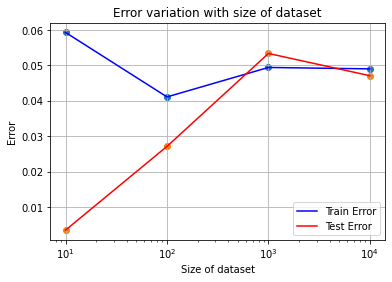

In [ ]:
import pylab
X_N = [10,100,1000,10000]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(X_N,train_error, 'b', label='Train Error')
plt.plot(X_N,test_error, 'r', label='Test Error')
plt.scatter(X_N,train_error)
plt.scatter(X_N,test_error)
plt.title('Error variation with size of dataset')
plt.ylabel('Error')
plt.xlabel('Size of dataset')
plt.legend()
plt.grid()
ax.set_xscale('log')
# plt.xticks(np.arange(1, 5, step=1))
plt.show()